# **Data Mining for Confidence Level Detection**

Lydia Lonzarich and Katie Park

CPSC 322-01, Fall 2025

# Import Libraries

In [118]:
import importlib

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyRandomForestClassifier, MyDecisionTreeClassifier, MyNaiveBayesClassifier, MyDecisionTreeSolo

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable

import matplotlib.pyplot as plt

# **Introduction**

## Dataset Description

The dataset used for this project is called "Confidence Detection Dataset," from Kaggle: https://www.kaggle.com/datasets/muhammadkhubaibahmad/confidence-detection-dataset

</br>

The dataset contains features extracted from human body landmarks and postures to classify confidence levels, which is also what is being classified for this project.


## Findings

3 different classifiers were used on the dataset:
1. Random Forest Classifier
1. Decision Tree Classifier
1. Naive Bayes Classifier

After using all 3 classifiers on the dataset, the classifier that performed the best was the Naive Bayes Classifier.

# **Data Analysis**

## Dataset Information

The dataset includes 19 attributes and 1 target (as defined by the dataset author), with 5,950 rows in total.

The class that is predicted from the attributes is "confidence_label," which can contains the class labels:
1. confident
2. neutral
3. low

</br>

Although there are 19 attributes used to classify confidence_label, only 9 attributes were used in the different classifier approaches. The 9 attributes were chosen as they were the only attributes that could be changed based on confidence level. Certain attributes in the dataset, such as "eye_distance," for example, which represents the distance between eyes, do not change if a person is confident or not, and so only attributes that were deemed to be possible predictors for confidence_label were used. These attributes include:
1. "body_lean_x"
    * A float value representing the horizontal body lean ratio
1. "shoulder_center_x"
    * A float value representing the X-coordinate of the shoulder center
1. "hip_center_x"
    * A float value representing the X-coordinate of the hip-center
1. "spine_angle"
    * A float value representing the spine inclination angle in degrees
1. "head_tilt_angle"
    * A float value representing the head tilt angle in degrees
1. "shoulder_slope"
    * A float value representing the slope of the shoulder line
1. "head_direction"
    * A categorical value representing the head orientation (can be "Looking Straight," "Center," "Looking Right," or "Looking Left")
1. "arm_position"
    * A categorical value representing the arm position (can be "Partially Open," "Closed Arms," or "Open Arms")
1. "posture"
    * A categorical vaue representing the general body posture (can be "Upright," "Stiff," or "Slouched).


## Dataset Loading

Below, the dataset is extracted and saved as a MyPyTable object. A copy is then created, as all the float values will undergo normalization and discretization for algorithm compatibility for all classifiers. The copy will ensure the original dataset's values are not changed, retaining its true values.


The copy of the dataset then undergoes normalization, ensuring all values are between [0, 1]. After being normalized, the values then undergo discretization, wherein every 0.1 (normalized) value is set to a value between [1, 10]. This ensures algorithms such as Decision Trees have a limited number of attribute values, preventing every unique float value creating a branch in the tree.

In [119]:
confidence_raw_data = MyPyTable().load_from_file("confidence_features.csv") # dataset before processing
confidence = confidence_raw_data.new_deep_copy() # the dataset we will normalize. Original dataset retains its true values

all_attributes = ["body_lean_x", "shoulder_center_x", "hip_center_x", "spine_angle", "head_tilt_angle", "shoulder_slope", "head_direction", "arm_position", "posture"]
continuous_attributes = all_attributes[:6]
categorical_attributes = all_attributes[6:]

# normalize cols that have type=float attribute values.
confidence.normalize_columns(continuous_attributes)

## Relevant Summary Statistics


In Figure 1 below, the distribution of class labels in the dataset are visualized, with over half being classified as "Confident," and the class with the smallest percentage being "Low," making up only 19.4%.

<function matplotlib.pyplot.show(close=None, block=None)>

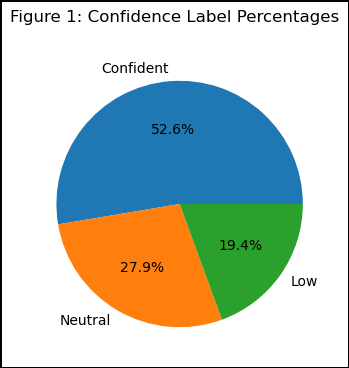

In [120]:
# Pie chart of the percentages of each confidence label in the dataset

# reset figure
plt.figure(figsize = (4, 4))

# get x and y values (frequency of each confidence label)
freq = myutils.get_frequency(confidence_raw_data.get_column("confidence_label"))

xs = []
ys = []

for key in freq:
    xs.append(key)
    ys.append(freq[key])

# create the chart (with number of decimals)
plt.pie(ys, labels = xs, autopct = "%1.1f%%")

# add border to current figure
fig = plt.gcf()

# add title to pie chart, and change formatting
fig.suptitle("Figure 1: Confidence Label Percentages")
fig.patch.set_edgecolor("black")
fig.patch.set_linewidth(1)

plt.show

Below, Figures 2, 3, and 4 show the life cycle of our data preprocessing, with Figure 2 showing a histogram, representing the distribution of the raw, unchanged data containing the true values from the original dataset.

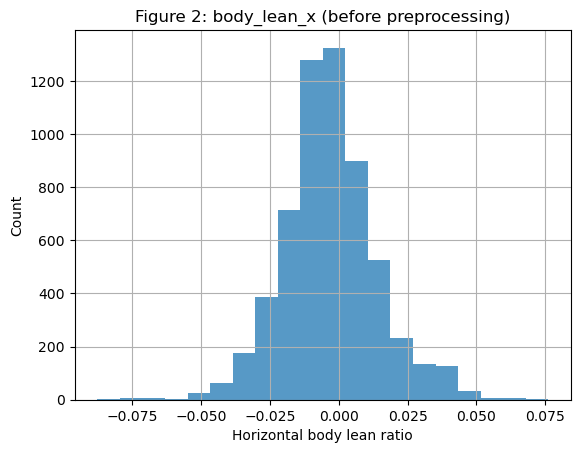

In [121]:
# Histogram of the body_lean_x attribute before preprocessing

# reset figure
plt.figure()

# get x values
x = confidence_raw_data.get_column("body_lean_x")

plt.hist(x, bins = 20, alpha = 0.75)
plt.grid(True)

# add titles
plt.title("Figure 2: body_lean_x (before preprocessing)")
plt.xlabel("Horizontal body lean ratio")
plt.ylabel("Count")

plt.show()

The data then undergoes normalization, as shown in Figure 3. Figure 3 shows a histogram, representing the distribution of the dataset after being normalized to the values between [0, 1].

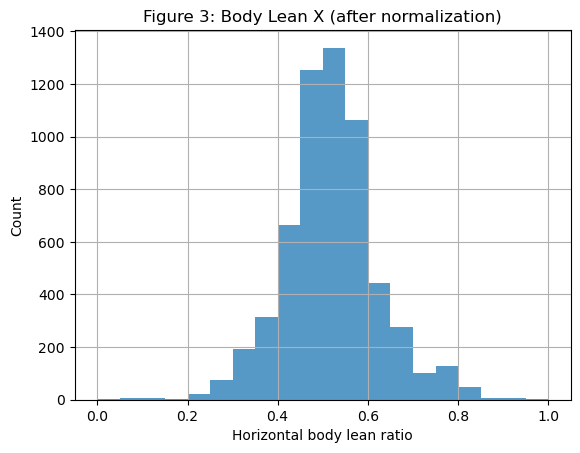

In [122]:
# Histogram of the body_lean_x attribute after normalization

# reset figure
plt.figure()

# get x values after normalization
x = confidence.get_column("body_lean_x")

plt.hist(x, bins = 20, alpha = 0.75)
plt.grid(True)

# add titles
plt.title("Figure 3: Body Lean X (after normalization)")
plt.xlabel("Horizontal body lean ratio")
plt.ylabel("Count")

plt.show()

After being normalized, the values are then discretization, where every 0.1 value is set to a value between [1, 10], meaning values between [0, 0.1] are set to 1, values between (0.1, 0.2] are set to 2, etc.

In [123]:
# find the column indices of the attributes we're using
att_indices = []
for att in all_attributes:
   att_idx = confidence.column_names.index(att)
   att_indices.append(att_idx)

# discretize values (to make continuous attribute vals --> categorical attribute vals)
for row_index, row in enumerate(confidence.data):
    for val_index, value in enumerate(row):
        if val_index in att_indices and type(confidence.data[row_index][val_index]) != str:
            confidence.data[row_index][val_index] = myutils.my_discretizer(confidence.data[row_index][val_index])

The distribution of the normalized and discretized values are shown in Figure 4, representing the distribution of values for the body_lean_X attribute.

This normalization and discretization is done to all float values that are attributes, ensuring consistency across all numeric values for future classification.

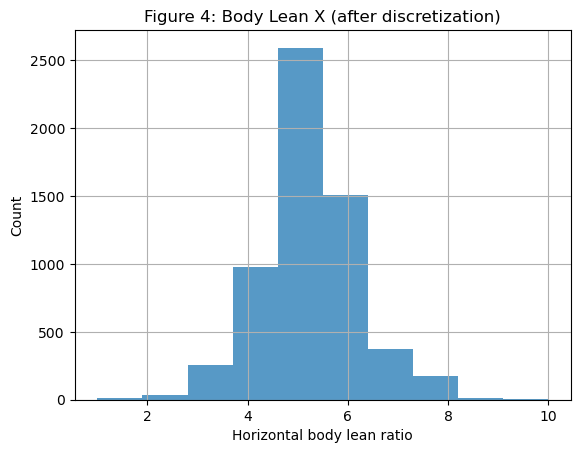

In [124]:
# Histogram of the body_lean_x attribute after discretization

# reset figure
plt.figure()

# get x values after normalization AND discretization
x = confidence.get_column("body_lean_x")

plt.hist(x, bins = 10, alpha = 0.75)
plt.grid(True)

# add titles
plt.title("Figure 4: Body Lean X (after discretization)")
plt.xlabel("Horizontal body lean ratio")
plt.ylabel("Count")

plt.show()

# **Classification Results**

The 3 different classification approaches that were developed were: Decision Tree classifier, Random Forest classifier, and Naive Bayes classifier.

Note: the Decision Tree classifier and Naive Bayes classifier use the k-fold cross validation approach to create training and testing sets. For both classifiers, k = 10.

## Implementing Decision Tree for Classification

Below, the Decision Tree classification is fitted, and then used to classify unseen instances. After, various performance metrics are used to verify the performance of the Decision Tree classifier.

</br>

**Generating Test and Training Sets**

For the Decision Tree classifier, the training and test sets are created using the k-fold cross validation approach, which partitions the dataset into k (approximately) equal subsets/folds. Then, training and testing is completed k times, wherein each fold becomes the test set one time.

</br>

**Fitting the Classifier**

After k sets of training and testing sets are created, a decision tree is fitted for each training set. Each decision tree is created by using the Top Down Induction of Decision Trees Algorithm. This algorithm selects an attribute to split the data based on having the lowest entropy (meaning the least uncertainty). Each partition is then repeatedly partitioned until either all class values for a partion is the same, there are no more attributes to split on, or there are no more instances to partition. In all cases, a leaf node is created.

</br>

**Predicting Unseen Instances**

After a decision tree is created for a fold, the testing set is then used against the tree to predict its class label. This is done by traversing down the tree, based on the attribute value at each node.

In [125]:
# define X and y data
X = confidence.get_column_rows(all_attributes)
y = confidence.get_column("confidence_label")

# get all unique class labels.
labels = list(set(y))

# compute k fold cross validation with k=10 folds to evaluate model performance across different train and test subsets of data.
acc, err_rate, precision, recall, f1, y_trues, y_preds = myutils.cross_val_predict(X, y, 10, MyDecisionTreeClassifier, True)

**Decision Tree Performance**

For each fold in the dataset, after the decision tree is fitted and tested against, the performance metrics for each fold is found. After all k folds fit and test against decision trees, the average for each performance metric is found, and outputted below.

The performance metrics include:
1. Accuracy
1. Error rate
1. Precision
1. Recall
1. F1 Score

The results of each performance metric is outputted below

In [126]:
print("----- PERFORMANCE METRICS FOR DECISION TREE -----")
print(f"Accuracy Score: {round(acc, 2)}")
print(f"Error Rate: {round(err_rate, 2)}")
print(f"Precision Score: {round(precision, 2)}")
print(f"Recall Score: {round(recall, 2)}")
print(f"F1 Score: {round(f1, 2)}")

----- PERFORMANCE METRICS FOR DECISION TREE -----
Accuracy Score: 0.73
Error Rate: 0.27
Precision Score: 0.79
Recall Score: 0.73
F1 Score: 0.68


## Implementing Random Forest for Classification

Below, the Random Forest classifier is fitted, and then used to classify unseen instances. After, various performance metrics are used to verify the performance of the Random Forest classifier.

</br>

**Generating Test and Training Sets**

For the Random Forest classifier, a pre-processing step occurs to the given dataset, wherein both training and testing sets are generated. This is done by first generating a random stratified test set, consisting of one third of the original dataset, with the test set having the same class distribution as the original dataset. After the test set is created, any remaining rows in the dataset that were not selected make up the training set for the classifier, which is then used to fit the classifier.

</br>

**Fitting the Classifier**

Fitting the classifier is done by creating N "random" decision trees using bootstrapping (a technique where random rows are selected with replacement, making up the training set. Any values not in the training set make up the test set) over the remainder set. At each node when creating the tree, F random attributes are selected as candidate attributes to partition data on (an attribute is still chosen based on entropy, similar to the Decision Tree classifier). After all N trees are created, the M most accurate decision trees, with accuracy being found based on the training and testing sets found using boostrapping, out of the N trees, are selected.

For this dataset, after testing against multiple N, F, and M values, it was determined the values did not change the performance of the Forest by much, so the Random Forest for the confidence level dataset is set to:
1. N = 20
1. M = 5
1. F = 4

In [127]:
# define X and y data
X = confidence.get_column_rows(all_attributes)
y = confidence.get_column("confidence_label")

# create a random forest classifer instance using the best N, M, and F parameters found.
myForest = MyRandomForestClassifier(N=20, M=5, F=4)

# train the random forest classifier on our train data. (class does internal split into train and test set, so here we just use internal train set).
myForest.fit(X, y)

**Predicting Unseen Instances**

After the Random Forest classifier is fitted, the testing sets found earlier are then used to against the classifier. This is done by running each unseen instance against all M trees. The class label predicted the most out of the M trees is then considered the predicted class for that unseen attribute.

In [128]:
y_preds = myForest.predict()

TypeError: 'NoneType' object is not iterable

**Random Forest Performance**

After the class predictions are found against the unseen instances, various performance metrics are used against the classifier to verify its performance.


The results of each performance metric is ouputted below.

In [ ]:
print("----- PERFORMANCE METRICS FOR RANDOM FOREST -----")
print(f"Accuracy Score: {round(myevaluation.accuracy_score(myForest.y_test, y_preds), 2)}")
print(f"Error Rate: {round(1 - myevaluation.accuracy_score(myForest.y_test, y_preds), 2)}")
print(f"Precision Score: {round(myevaluation.multiclass_precision_score(myForest.y_test, y_preds, ["Confident", "Neutral", "Low"]), 2)}")
print(f"Recall Score: {round(myevaluation.multiclass_recall_score(myForest.y_test, y_preds, ["Confident", "Neutral", "Low"]), 2)}")
print(f"F1 Score: {round(myevaluation.multiclass_f1_score(myForest.y_test, y_preds, ["Confident", "Neutral", "Low"]), 2)}")

----- PERFORMANCE METRICS FOR RANDOM FOREST -----
Accuracy Score: 0.55
Error Rate: 0.45
Precision Score: 0.38
Recall Score: 0.55
F1 Score: 0.44


In [ ]:
myForest = MyRandomForestClassifier(N = 20, M = 10, F = 9)
X_train, X_test, y_train, y_test = myForest.generate_test_set(confidence.get_column_rows(all_attributes), confidence.get_column("confidence_label"))

myForest.fit(X_train, y_train)
y_pred = myForest.predict(X_test)

print(myevaluation.accuracy_score(y_test, y_pred))

current_att: [0, 1, 2, 3, 4, 5, 6, 7, 8]
subset: [0, 8, 5, 2, 7, 1, 3, 4, 6]
attribute to split index: 7
confirming index is 7, from list: [0, 1, 2, 3, 4, 5, 6, 7, 8]
confirming index 7 is not in list [0, 1, 2, 3, 4, 5, 6, 8], from list: [0, 1, 2, 3, 4, 5, 6, 7, 8]
current_att: [0, 1, 2, 3, 4, 5, 6, 8]
subset: [6, 3, 4, 5, 8, 2, 1, 0]
attribute to split index: 0
leaf 3
subset: 1
confirming index is 7, from list: [0, 1, 2, 3, 4, 5, 6, 7, 8]
confirming index 7 is not in list [0, 1, 2, 3, 4, 5, 6, 8], from list: [0, 1, 2, 3, 4, 5, 6, 7, 8]
current_att: [0, 1, 2, 3, 4, 5, 6, 8]
subset: [1, 8, 2, 4, 6, 0, 5, 3]
attribute to split index: 4
confirming index is 4, from list: [0, 1, 2, 3, 4, 5, 6, 8]
confirming index 4 is not in list [0, 1, 2, 3, 5, 6, 8], from list: [0, 1, 2, 3, 4, 5, 6, 8]
current_att: [0, 1, 2, 3, 5, 6, 8]
subset: [5, 8, 0, 2, 1, 6, 3]
attribute to split index: 0
leaf 3
subset: 1
confirming index is 4, from list: [0, 1, 2, 3, 4, 5, 6, 8]
confirming index 4 is not in list [0,

In [ ]:
myTree = MyDecisionTreeClassifier()
myTree.fit(X_train, y_train)

y_pred = myTree.predict(X_test)

print(myevaluation.accuracy_score(y_test, y_pred))

current_att: [0, 1, 2, 3, 4, 5, 6, 7, 8]
subset: [0, 1, 2, 3, 4, 5, 6, 7, 8]
attribute to split index: 7
confirming index is 7, from list: [0, 1, 2, 3, 4, 5, 6, 7, 8]
confirming index 7 is not in list [0, 1, 2, 3, 4, 5, 6, 8], from list: [0, 1, 2, 3, 4, 5, 6, 7, 8]
current_att: [0, 1, 2, 3, 4, 5, 6, 8]
subset: [0, 1, 2, 3, 4, 5, 6, 8]
attribute to split index: 0
leaf 3
subset: 1
confirming index is 7, from list: [0, 1, 2, 3, 4, 5, 6, 7, 8]
confirming index 7 is not in list [0, 1, 2, 3, 4, 5, 6, 8], from list: [0, 1, 2, 3, 4, 5, 6, 7, 8]
current_att: [0, 1, 2, 3, 4, 5, 6, 8]
subset: [0, 1, 2, 3, 4, 5, 6, 8]
attribute to split index: 4
confirming index is 4, from list: [0, 1, 2, 3, 4, 5, 6, 8]
confirming index 4 is not in list [0, 1, 2, 3, 5, 6, 8], from list: [0, 1, 2, 3, 4, 5, 6, 8]
current_att: [0, 1, 2, 3, 5, 6, 8]
subset: [0, 1, 2, 3, 5, 6, 8]
attribute to split index: 0
leaf 3
subset: 1
confirming index is 4, from list: [0, 1, 2, 3, 4, 5, 6, 8]
confirming index 4 is not in list [0,

In [ ]:
# folds = myutils.cross_val_predict(confidence.get_columns(all_attributes), 10, 8)

column_indices = []
for i in all_attributes:
    column_indices.append(confidence.column_names.index(i))

folds = myutils.cross_val_predict(confidence.get_column_rows(all_attributes), 10)
# divides data into individual lists containing training and testing indices
X_train_indices = []
X_test_indices = []
for items in folds:
    [X_train_indices.append(items[0])] # X values needs to be a 2d list
    [X_test_indices.append(items[1])]

X_train = []
X_test = []
y_train = []
y_test = []

# finds the actual values for each training indices set
for row in X_train_indices:
    temp_x_training_row = [] # makes sure to divide each row
    temp_y_training_row = []
    for index in row:
        # finds the y values for each x (as this approach doesn't return y-train)
        temp_y_training_row.append(confidence.get_column("confidence_label")[index])
        temp_row = [] # ensures each row is a 2d list
        for col_index in column_indices:
            # saves the values of the specific columns for each row, not just the row itself
            temp_row.append(confidence.data[index][col_index])
        temp_x_training_row.append(temp_row)
    y_train.append(temp_y_training_row)
    X_train.append(temp_x_training_row)

# finds the actual values for each testing indices set
for row in X_test_indices:
    temp_x_testing_row = [] # makes sure to divide each row
    temp_y_testing_row = []
    for index in row:
        # finds the y values for each x (as this approach doesn't return y-test/actual y values)
        temp_y_testing_row.append(confidence.get_column("confidence_label")[index])
        temp_row = [] # ensures each row is a 2d list
        for col_index in column_indices:
            # saves the values of the specific columns for each row, not just the row itself
            temp_row.append(confidence.data[index][col_index])
        temp_x_testing_row.append(temp_row) 
    y_test.append(temp_y_testing_row)
    X_test.append(temp_x_testing_row)

In [ ]:
myForest = MyRandomForestClassifier(N = 10, M = 5, F = 5)

# sets up all needed performance metrics to find average
total_accuracy = 0
total_precision = 0
total_recall = 0
total_f1_score = 0
# for Naive Bayes matrice (needs to be a 1D list)
y_pred = []
y_actual = []

for index in range(len(X_train)): 
    myForest.fit(X_train[index], y_train[index]) # fits classifier for each fold
    # adds to list for confusion matrice
    y_pred.extend(myForest.predict(X_test[index]))
    y_actual.extend(y_test[index])

    # adds all performance matrice for each fold, so average can be calculated later
    total_accuracy += myevaluation.accuracy_score(y_test[index], myForest.predict(X_test[index]))
    total_precision += myevaluation.multiclass_precision_score(y_test[index], myForest.predict(X_test[index]))
    total_recall += myevaluation.multiclass_recall_score(y_test[index], myForest.predict(X_test[index]))
    total_f1_score += myevaluation.multiclass_f1_score(y_test[index], myForest.predict(X_test[index]))

# calculates average over each fold (10 folds, so divide total by 10)
accuracy = total_accuracy / 10
error_rate = 1 - accuracy
precision = total_precision / 10
recall = total_recall / 10
f1_score = total_f1_score / 10

In [ ]:
print(accuracy)
print(error_rate)
print(precision)
print(recall)
print(f1_score)

0.7545576210282092
0.24544237897179078
0.7977677104141268
0.7545576210282092
0.7092234432618504
